In [5]:
import pandas as pd

column_names = [
    'age', 
    'sex',
    'cp', 
    'trestbps',
    'chol', 
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca', 
    'thal',
    'target'
]

# Load data without headers
df = pd.read_csv('../data/heart_disease.csv', header=None)
df.columns = column_names

# Display first few rows to confirm loading

print(df.head())
print(df.shape) 
print((df == -9.0).sum())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  target  
0   0     6       0  
1   3     3       2  
2   2     7       1  
3   0     3       0  
4   0     3       0  
(920, 14)
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


### Replace -9.0 with NaN first, then impute: 

In [5]:
import numpy as np

# Replace -9.0 with NaN to use pandas' built-in missing value handling
df.replace(-9.0, np.nan, inplace=True)

# Check for NaN values now
print(df.isnull().sum())

# Example: Impute missing numerical values with the median
from sklearn.impute import SimpleImputer

# Identify numerical columns (excluding 'target' for now)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Impute numerical columns
imputer_num = SimpleImputer(strategy='median') # or 'mean'
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Example: Impute missing categorical values (cp, restecg, slope, ca, thal, sex, fbs, exang) with the mode
# Note: 'ca' and 'thal' are categorical despite being numeric codes.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Using pandas fillna for simplicity with mode (you could also use SimpleImputer(strategy='most_frequent'))
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()
        if not mode_value.empty:
             df[col].fillna(mode_value[0], inplace=True) # Fill with the first mode value

# Check for remaining NaN values
print(df.isnull().sum())
print(df.head(20)) # Inspect rows that had missing values

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63.0    1   1     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1   67.0    1   4     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2   67.0    1   4     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3   37.0    1   3     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4   41.0    0   2     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5   56.0    1   2     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6   62.0    0  

/tmp/ipykernel_13572/3606268306.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value[0], inplace=True) # Fill with the first mode value


### Data Encoding

In [6]:
# Check data types and unique values
print(df.dtypes)
for col in categorical_cols:
    print(f"Unique values in {col}: {sorted(df[col].unique())}")

# If you decide to one-hot encode specific columns (example for 'cp'):
# df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], prefix=['cp', 'restecg', 'slope', 'thal'])

# Ensure 'target' is treated correctly
# The project likely wants to predict presence (1) vs absence (0) of heart disease.
# The original target has values 0, 1, 2, 3, 4.
# Convert to binary: 0 (no disease) vs 1 (disease present)
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
print(f"Unique values in target after conversion: {sorted(df['target'].unique())}")

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object
Unique values in sex: [np.int64(0), np.int64(1)]
Unique values in cp: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Unique values in fbs: [np.float64(0.0), np.float64(1.0)]
Unique values in restecg: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
Unique values in exang: [np.float64(0.0), np.float64(1.0)]
Unique values in slope: [np.float64(1.0), np.float64(2.0), np.float64(3.0)]
Unique values in ca: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)]
Unique values in thal: [np.float64(3.0), np.float64(6.0), np.float64(7.0)]
Unique values in target after conversion: [np.int64(0), np.int64(1)]


### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

print(X_scaled.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  1.007386    1   1  0.705176  0.303643  1.0      2.0  0.489727    0.0   
1  1.432034    1   4  1.518569  0.789967  0.0      2.0 -1.181478    1.0   
2  1.432034    1   4 -0.650479  0.266939  0.0      2.0 -0.345875    1.0   
3 -1.752828    1   3 -0.108217  0.459634  0.0      0.0  1.961979    0.0   
4 -1.328180    0   2 -0.108217  0.037541  0.0      2.0  1.365120    0.0   

    oldpeak  slope   ca  thal  
0  1.368109    3.0  0.0   6.0  
1  0.611589    2.0  3.0   3.0  
2  1.651804    2.0  2.0   7.0  
3  2.502889    3.0  0.0   3.0  
4  0.517024    1.0  0.0   3.0  


### Exploratory Data Analysis (EDA)

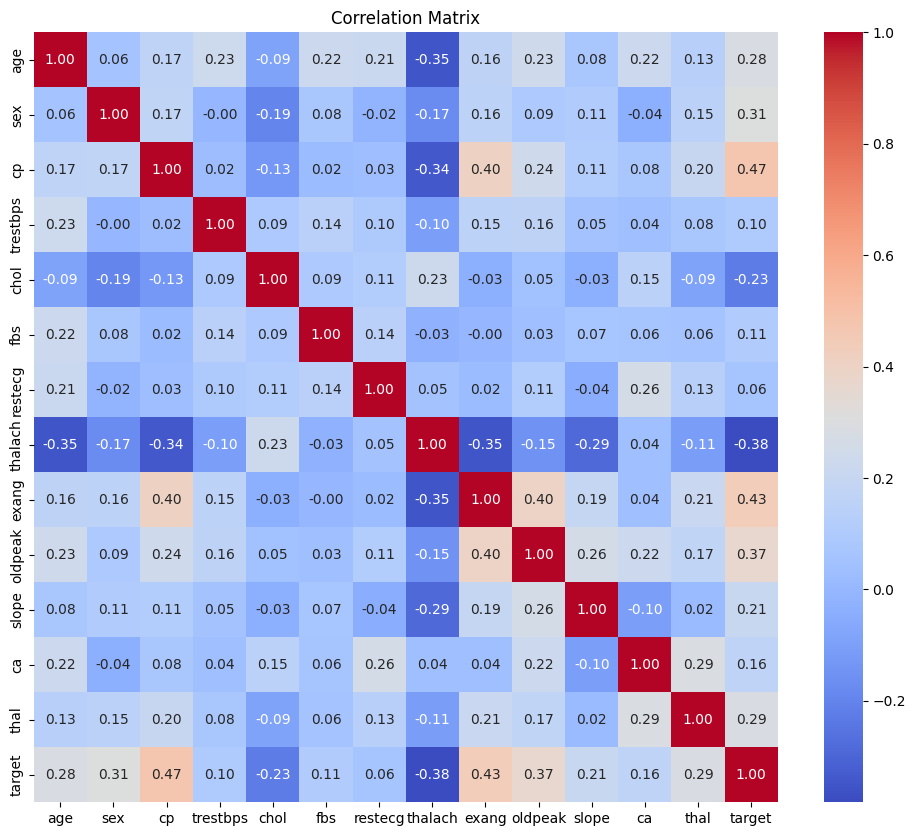

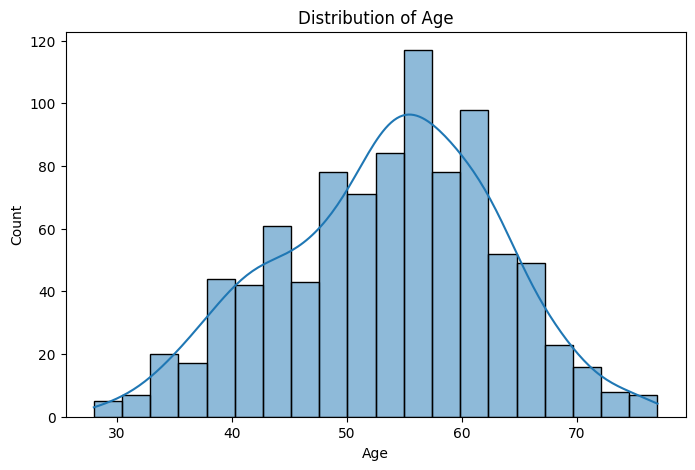

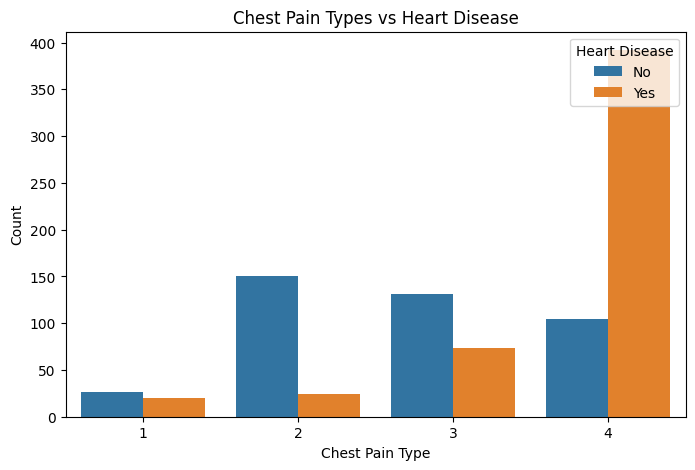

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(12, 10))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Types vs Heart Disease')
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease", loc="upper right", labels=['No', 'Yes'])
plt.show()

In [11]:
df.to_csv('../data/processed_heart_disease.csv', index=False)
print("Preprocessed data saved to data/processed_heart_disease.csv")

Preprocessed data saved to data/processed_heart_disease.csv
